# Continuación clase de optimización de código

In [15]:
# Paquetes a utilizar
from functools import reduce
import numpy as np
import scipy.special as sps 
from itertools import cycle  # Librería para hacer ciclos
import matplotlib.pyplot as plt

## Tres formas distintas de obtener el mismo resultado 

In [35]:
N = 5
ftri = [np.cos, np.sin, np.tan]

# Compresión de listas
call = [list(map(lambda x: x(n),ftri)) for n in range(N)]

# Función map
call2 = list(map(lambda y: list(map(lambda x: x(y),ftri)),np.arange(0,N)))

# Ciclo For tradicional 
call3 = []
for i in range(0,N):
    callaux = []
    for fcn in ftri:
        callaux.append(fcn(i))
    call3.append(callaux) 
call3    

[[1.0, 0.0, 0.0],
 [0.5403023058681398, 0.8414709848078965, 1.557407724654902],
 [-0.4161468365471424, 0.9092974268256817, -2.185039863261519],
 [-0.9899924966004454, 0.1411200080598672, -0.1425465430742778],
 [-0.6536436208636119, -0.7568024953079282, 1.1578212823495775]]

### Ejercicio: Vectorizar distribución de poisson
$$\textbf{Función de densidad de probabilidad}\\p(k)=\frac{\lambda^k e^{-\lambda}}{k!},\quad k\in \mathbb{N}$$

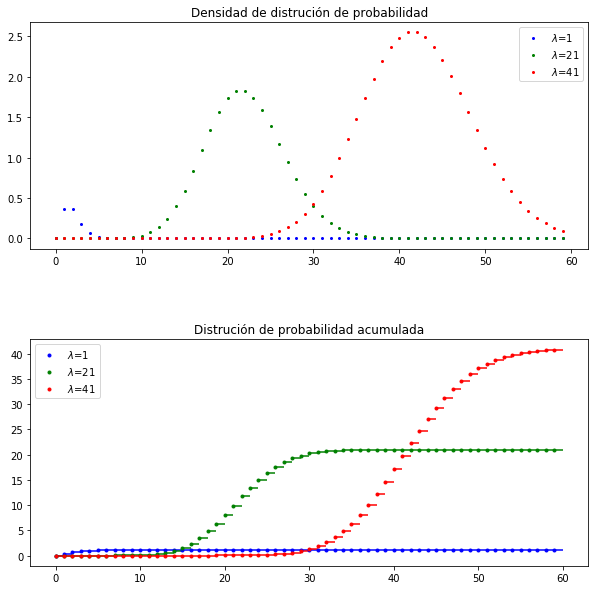

In [36]:
## Forma de resolver el problema de manera típica
cycol = cycle('bgrcmk')

p = lambda k,l:(l**k*np.exp(-l))/sps.gamma(k)

# Como se haría de forma ineficiente
l= 1

# Configurar los subplots
# plt.rcParams['figure.figsize'] = [10, 5]

# Gráficas en diferentes subplots
fig, (ax1, ax2) = plt.subplots(2, 1);
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.title.set_text('Densidad de distrución de probabilidad')
ax2.title.set_text('Distrución de probabilidad acumulada')

for i in range(3):
    P = []
    c = next(cycol)
    for k in range(60):
        P.append(p(k,l))
    
    ax1.plot(P,'o',c=c,label='$\lambda$=%s' % l, markersize=2)        
    ax1.legend()
    
    ax2.plot(np.cumsum(P),'o',c=c,label='$\lambda$=%s' % l, markersize=3)
    ax2.legend()
    ax2.hlines(np.cumsum(P),range(len(P)),range(1,len(P)+1),color=c)
    l +=20

    
plt.subplots_adjust(hspace=.4)
plt.show()


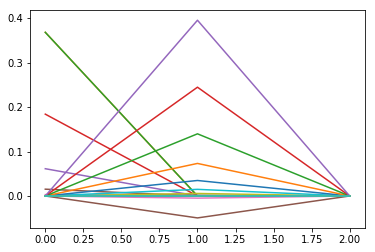

In [38]:
l= np.arange(1,42,20)
k= np.arange(60)
a= np.matrix([list(map(p,k,np.tile(i,len(k)))) for i in l])
plt.plot(a)
plt.show()


## Resolverlo de manera vectorizada


In [ ]:
# Función para graficar
def plotExponential(lamb2,k,ones,cycol):
    L = lamb2*ones
    P = list(map(p,k,L))
    c = next(cycol)
    ax1.plot(P,'o',c=c,label='$\lambda$=%d' % lamb2, markersize=2)
    ax1.legend()
    
    ax2.plot(np.cumsum(P),'o',c=c,label='$\lambda$=%s' % l, markersize=3)
    ax2.legend()
    ax2.hlines(np.cumsum(P),range(len(P)),range(1,len(P)+1),color=c)

# Forma vectorizada
cycol = cycle('bgrcmk')
N = 70
k = np.arange(0,N)
l = np.arange(1,42,20)
p = lambda k,l:(l**k*np.exp(-l))/sps.gamma(k)
ones = np.ones(len(k))

# Gráficas en diferentes subplots
fig, (ax1, ax2) = plt.subplots(2, 1);
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.title.set_text('Densidad de distrución de probabilidad')
ax2.title.set_text('Distrución de probabilidad acumulada')

[plotExponential(l) for l in range(1,42,20)]

plt.subplots_adjust(hspace=0.2)
plt.show()


# Ejercicios 

1. Imagine una rutina contable utilizada en una librería. Funciona en una lista con sublistas, que se ven así:
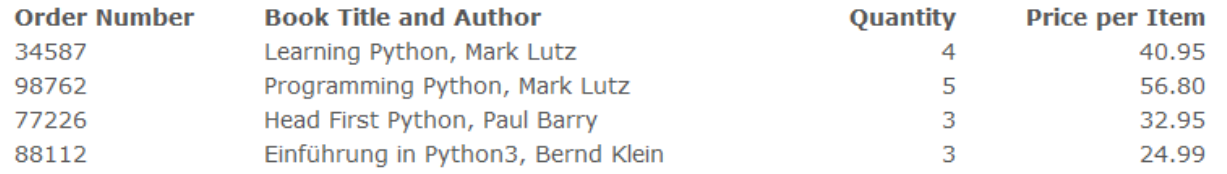
Escriba un programa en Python, que devuelve una lista con tuplas de tamaño 2. Cada tupla consiste en el número de pedido y el costo total del pedido. El producto debe aumentarse en 10€ si el valor de la orden es inferior a 100,00 €. 
Escribe un programa Python usando unicamente las funciones **lambda y map**.

In [48]:
########### Solución
orders = [ ["34587", "Learning Python, Mark Lutz", 4, 40.95], 
           ["98762", "Programming Python, Mark Lutz", 5, 56.80], 
           ["77226", "Head First Python, Paul Barry", 3,32.95],
           ["88112", "Einführung in Python3, Bernd Klein", 3, 24.99]]



[['34587', 163.8],
 ['98762', 284.0],
 ['77226', 98.85000000000001],
 ['88112', 74.97]]

### Forma alternativa

In [4]:
min_order = 100
invoice_totals = list(map(lambda x: x if x[1] >= min_order else (x[0], x[1] + 10), 
                 map(lambda x: (x[0],x[2] * x[3]), orders)))
print(invoice_totals)


[('34587', 163.8), ('98762', 284.0), ('77226', 108.85000000000001), ('88112', 84.97)]


2. La misma librería, pero esta vez trabajamos en una lista diferente. Las sublistas de nuestras listas se ven así: 
[número de orden, (número de artículo, cantidad, precio por unidad), ... (número de artículo, cantidad, precio por unidad)] 

`orders = [[1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
	       [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
	       [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]`

Escriba un programa que devuelva una lista de dos tuplas que tengan la información de (número de pedido, cantidad total de pedido). Utilice la función `Reduce`.

In [2]:
########### Solución
orders = [ [1, ("5464", 4, 9.99), ("8274",18,12.99), ("9744", 9, 44.95)], 
           [2, ("5464", 9, 9.99), ("9744", 9, 44.95)],
           [3, ("5464", 9, 9.99), ("88112", 11, 24.99)],
           [4, ("8732", 7, 11.99), ("7733",11,18.99), ("88112", 5, 39.95)] ]




[[1, 688.3299999999999], [2, 504.46000000000004], [3, 374.79999999999995], [4, 502.57]]


3. Use filter to eliminate all words that are shorter than 4 letters from a list of words
`list='the notion of a lambda function goes all the way back to the origin of computer science'`

In [23]:
########### Solución
texto='the notion of a lambda function goes all the way back to the \
        origin of computer science'


['notion', 'lambda', 'function', 'goes', 'back', 'origin', 'computer', 'science']


4. Use filter to determine the percentage of Fahrenheit temperatures in a list are within the range 32 to 80

In [14]:
########### Solución 
np.random.seed(55555)
temperatures = np.random.uniform(25,110,30)
print(temperatures)



[ 35.97387961  99.13294268  92.6178302   99.69549478  63.21119535
  73.90387697  95.50028838  99.21476553  36.98251238 101.45813729
 100.5917418   89.38159435  89.52156589  83.8084752   28.37990868
  68.75395211  45.86132067  36.58307493  56.32208365  33.96219302
  45.29071318  74.86289938  66.51091383  88.19316186  94.26635864
  46.83131624 109.60744472 109.68427993  44.55796499  92.84146259]
El porcentaje de temperaturas entre 32 y 80 es:46.67 porciento


5. Use reduce to find the lower left corner (minimum x and minimum y value) for a list of point locations

In [52]:
########### Solución 5
np.random.seed(55555)
point_xy = np.random.randint(0,100,[30,2])
print(point_xy)



[[17 97]
 [22 33]
 [37 46]
 [57 28]
 [11 25]
 [14  2]
 [74 16]
 [12 37]
 [35 21]
 [66 65]
 [86 58]
 [67 81]
 [ 0 48]
 [28 66]
 [76 22]
 [46 47]
 [64  7]
 [88 94]
 [65 13]
 [75 89]
 [23 17]
 [36 63]
 [62 36]
 [64 17]
 [18 19]
 [88 41]
 [21 49]
 [98 36]
 [81 73]
 [62 90]]
El mínimo valor de x es: 0


6. Find all of the numbers from 1-1000 that are divisible by 7

In [18]:
# como se llegaría al mismo resultado usando compresión de listas
# results = [num for num in range(1000) if num % 7 == 0]

# Solución utilizando la función filter
number = np.arange(1,1001)


Los números divisibles por 7 son:
 [7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175, 182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252, 259, 266, 273, 280, 287, 294, 301, 308, 315, 322, 329, 336, 343, 350, 357, 364, 371, 378, 385, 392, 399, 406, 413, 420, 427, 434, 441, 448, 455, 462, 469, 476, 483, 490, 497, 504, 511, 518, 525, 532, 539, 546, 553, 560, 567, 574, 581, 588, 595, 602, 609, 616, 623, 630, 637, 644, 651, 658, 665, 672, 679, 686, 693, 700, 707, 714, 721, 728, 735, 742, 749, 756, 763, 770, 777, 784, 791, 798, 805, 812, 819, 826, 833, 840, 847, 854, 861, 868, 875, 882, 889, 896, 903, 910, 917, 924, 931, 938, 945, 952, 959, 966, 973, 980, 987, 994]


7. Find all of the numbers from 1-1000 that have a 3 in them

In [23]:
# como se llegaría al mismo resultado usando compresión de listas
# results = [num for num in range(1000) if '3' in list(str(num))]

# Solución utilizando la función filter
number = np.arange(1,1001)


[3, 13, 23, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43, 53, 63, 73, 83, 93, 103, 113, 123, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 143, 153, 163, 173, 183, 193, 203, 213, 223, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 243, 253, 263, 273, 283, 293, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 403, 413, 423, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 443, 453, 463, 473, 483, 493, 503, 513, 523, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 543, 553, 563, 573, 583, 593, 603, 613, 623, 630, 631, 632, 633, 634, 635,